In [1]:
import numpy as np
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import torch
import seaborn as sns
from scipy.stats import mannwhitneyu

In [2]:
sns.set_theme(style="whitegrid")
np.set_printoptions(formatter={'float': '{: 0.5f}'.format})
palette = sns.color_palette("husl", 12)

In [3]:
with open('logs/vol_str_True_20.26/dual.pickle', 'rb') as fp:
    scot_dual = pickle.load(fp)

with open('logs/vol_str_True_20.26/sam.pickle', 'rb') as fp:
    scot_f = pickle.load(fp)
    
with open('logs/vol_str_True_20.26/lam.pickle', 'rb') as fp:
    scot_lam = pickle.load(fp)
    
with open('logs/vol_str_True_20.26/cost.pickle', 'rb') as fp:
    scot_c = pickle.load(fp)

with open('logs/vol_str_True_20.26/y_hist.pickle', 'rb') as fp:
    scot_y = pickle.load(fp)

with open('logs/vol_str_True_20.26/x_hist.pickle', 'rb') as fp:
    scot_x = pickle.load(fp)

In [4]:
scot_x.shape

(50, 52)

In [6]:
with open('logs/vol_str_False_22.26/dual.pickle', 'rb') as fp:
    sot_dual = pickle.load(fp)

with open('logs/vol_str_False_22.26/sam.pickle', 'rb') as fp:
    sot_f = pickle.load(fp)
    
with open('logs/vol_str_False_22.26/lam.pickle', 'rb') as fp:
    sot_lam = pickle.load(fp)

with open('logs/vol_str_False_22.26/cost.pickle', 'rb') as fp:
    sot_c = pickle.load(fp)
    
with open('logs/vol_str_False_22.26/y_hist.pickle', 'rb') as fp:
    sot_y = pickle.load(fp)

with open('logs/vol_str_False_22.26/x_hist.pickle', 'rb') as fp:
    sot_x = pickle.load(fp)

In [7]:
sot_x.shape

(50, 52)

In [72]:
with open('logs/vol_ot_18.34/dual.pickle', 'rb') as fp:
    ot_dual = pickle.load(fp)

with open('logs/vol_ot_18.34/sam.pickle', 'rb') as fp:
    ot_f = pickle.load(fp)
    
with open('logs/vol_ot_18.34/lam.pickle', 'rb') as fp:
    ot_lam = pickle.load(fp)

with open('logs/vol_ot_18.34/cost.pickle', 'rb') as fp:
    ot_c = pickle.load(fp)

with open('logs/vol_ot_18.34/y_hist.pickle', 'rb') as fp:
    ot_y = pickle.load(fp)

with open('logs/vol_ot_18.34/x_hist.pickle', 'rb') as fp:
    ot_x = pickle.load(fp)

In [53]:
ot_x.shape

(50, 52)

In [62]:
n_ins, n_period = sot_x.shape

df = []

for ins in range(n_ins):
    val = scot_x[ins, :]
    df.append(pd.DataFrame({'val':val, 'instance': ins*np.ones(n_period), 'type':['x',]*n_period, 
                            'step': np.arange(n_period)}))
    
for ins in range(n_ins):
    val = ot_y[ins, :]
    df.append(pd.DataFrame({'val':val, 'instance': ins*np.ones(n_period), 'type':['OT',]*n_period, 
                            'step': np.arange(n_period)}))
    
for ins in range(n_ins):
    val = sot_y[ins, :]
    df.append(pd.DataFrame({'val':val, 'instance': ins*np.ones(n_period), 'type':['SOT',]*n_period, 
                            'step': np.arange(n_period)}))

for ins in range(n_ins):
    val = scot_y[ins, :]
    df.append(pd.DataFrame({'val':val, 'instance': ins*np.ones(n_period), 'type':['SCOT',]*n_period, 
                            'step': np.arange(n_period)}))

df = pd.concat(df)
df = df.reset_index(drop=True)

In [63]:
scot_x

array([[ 0.60993,  0.22780,  0.25024, ...,  0.19296,  0.17899,  0.37922],
       [ 0.60993,  0.22780,  0.25024, ...,  0.19296,  0.17899,  0.37922],
       [ 0.60993,  0.22780,  0.25024, ...,  0.19296,  0.17899,  0.37922],
       ...,
       [ 0.60993,  0.22780,  0.25024, ...,  0.19296,  0.17899,  0.37922],
       [ 0.60993,  0.22780,  0.25024, ...,  0.19296,  0.17899,  0.37922],
       [ 0.60993,  0.22780,  0.25024, ...,  0.19296,  0.17899,  0.37922]],
      dtype=float32)

# Sample path

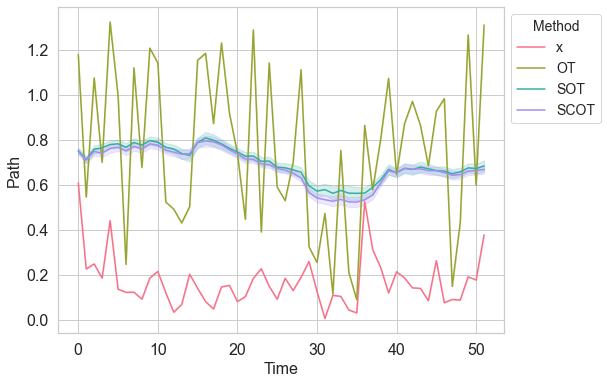

In [68]:
# same x batch every time
plt.figure(figsize=(8,6))
palette = sns.color_palette("husl", 4)
g = sns.lineplot(data=df, x='step', y='val', hue='type', palette=palette, ci=90)
plt.xlabel('Time', fontsize=16)
plt.ylabel('Path', fontsize=16)
g.tick_params(axis = 'both', which = 'major', labelsize = 16)
plt.legend(bbox_to_anchor=(1, 1), title='Method', fontsize=14, title_fontsize=14)
# plt.show()
plt.savefig('path.pdf', format='pdf', dpi=1000, bbox_inches='tight', pad_inches=0.1)

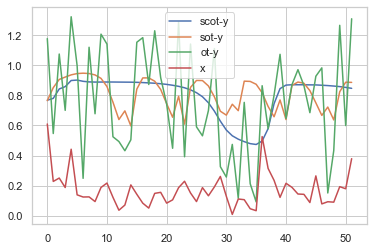

In [84]:
plt.plot(scot_y[idx, :], label='scot-y')
plt.plot(sot_y[idx, :], label='sot-y')
plt.plot(ot_y[idx, :], label='ot-y')
plt.plot(ot_x[idx, :], label='x')
plt.legend(loc='best')
plt.show()

# Dual values

In [86]:
ot_dual[:, -200:].mean(), ot_dual[:, -200:].std()

(2.8751323, 5.6440786e-07)

In [87]:
sot_dual[:, -200:].mean(), sot_dual[:, -200:].std()

(2.0222929, 0.14519866)

In [88]:
scot_dual[:, -200:].mean(), scot_dual[:, -200:].std()

(1.9284265, 0.2687166)

In [105]:
sot_agg = sot_dual[:, -100:].reshape(-1)
scot_agg = scot_dual[:, -100:].reshape(-1)
stat, pval = mannwhitneyu(sot_agg, scot_agg, alternative='greater')

In [106]:
pval

1.1466276010245399e-32

In [95]:
sot_mean = sot_dual[:, -200:].mean(axis=1)

In [96]:
scot_mean = scot_dual[:, -200:].mean(axis=1)

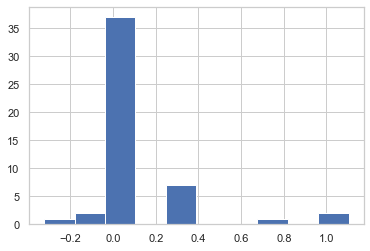

In [97]:
plt.hist((sot_mean - scot_mean).reshape(-1))
plt.show()

# Cost

In [70]:
scot_c.shape

(50, 4000)

In [78]:
n_ins, n_period = scot_c.shape
s_idx = 0
n_subp = int((n_period-s_idx)/100)

df = []

for ins in range(n_ins):
    val = ot_c[ins, s_idx::100]
    df.append(pd.DataFrame({'f':val, 'instance': ins*np.ones(n_subp), 'type':['OT',]*n_subp, 
                            'step': np.arange(n_subp)}))
    
for ins in range(n_ins):
    val = sot_c[ins, s_idx::100]
    df.append(pd.DataFrame({'f':val, 'instance': ins*np.ones(n_subp), 'type':['SOT',]*n_subp, 
                            'step': np.arange(n_subp)}))

for ins in range(n_ins):
    val = scot_c[ins, s_idx::100]
    df.append(pd.DataFrame({'f':val, 'instance': ins*np.ones(n_subp), 'type':['SCOT',]*n_subp, 
                            'step': np.arange(n_subp)}))

df = pd.concat(df)
df = df.reset_index(drop=True)

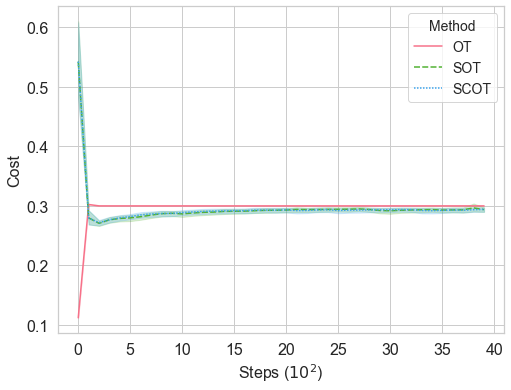

In [79]:
plt.figure(figsize=(8,6))
palette = sns.color_palette("husl", 3)
g = sns.lineplot(data=df, x='step', y='f', hue='type', palette=palette, ci=90, style='type')
plt.xlabel(r'Steps ($10^2$)', fontsize=16)
plt.ylabel('Cost', fontsize=16)
g.tick_params(axis = 'both', which = 'major', labelsize = 16)
plt.legend(bbox_to_anchor=(1, 1), title='Method', fontsize=14, title_fontsize=14)
# plt.show()
plt.savefig('cost.pdf', format='pdf', dpi=1000, bbox_inches='tight', pad_inches=0.1)

# Lambda

In [80]:
scot_lam.shape

(50, 4000)

In [81]:
n_ins, n_period = scot_lam.shape
s_idx = 0
n_subp = int((n_period-s_idx)/100)

df = []

for ins in range(n_ins):
    val = ot_lam[ins, s_idx::100]
    df.append(pd.DataFrame({'f':val, 'instance': ins*np.ones(n_subp), 'type':['OT',]*n_subp, 
                            'step': np.arange(n_subp)}))
    
for ins in range(n_ins):
    val = sot_lam[ins, s_idx::100]
    df.append(pd.DataFrame({'f':val, 'instance': ins*np.ones(n_subp), 'type':['SOT',]*n_subp, 
                            'step': np.arange(n_subp)}))

for ins in range(n_ins):
    val = scot_lam[ins, s_idx::100]
    df.append(pd.DataFrame({'f':val, 'instance': ins*np.ones(n_subp), 'type':['SCOT',]*n_subp, 
                            'step': np.arange(n_subp)}))

df = pd.concat(df)
df = df.reset_index(drop=True)

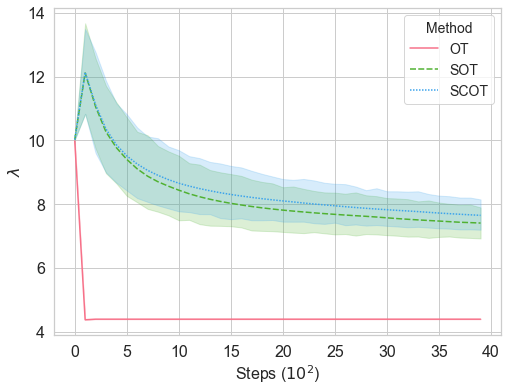

In [83]:
plt.figure(figsize=(8,6))
palette = sns.color_palette("husl", 3)
g = sns.lineplot(data=df, x='step', y='f', hue='type', palette=palette, ci=90, style='type')
plt.xlabel(r'Steps ($10^2$)', fontsize=16)
plt.ylabel(r'$\lambda$', fontsize=16)
g.tick_params(axis = 'both', which = 'major', labelsize = 16)
plt.legend(bbox_to_anchor=(1, 1), title='Method', fontsize=14, title_fontsize=14)
# plt.show()
plt.savefig('lam.pdf', format='pdf', dpi=1000, bbox_inches='tight', pad_inches=0.1)

# Objective weights and bias

In [99]:
with open('weight.pickle', 'rb') as fp:
    weight = pickle.load(fp)
    
with open('bias.pickle', 'rb') as fp:
    bias = pickle.load(fp)

In [100]:
x = np.arange(-10, 10, 0.01)
result = np.zeros_like(x)
for k in range(len(x)):
    result[k] = weight.sum()*x[k] + bias

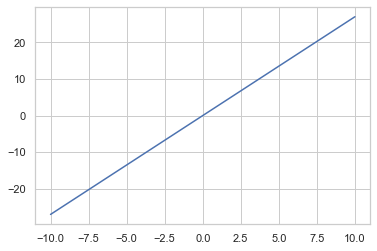

In [101]:
plt.plot(x, result)

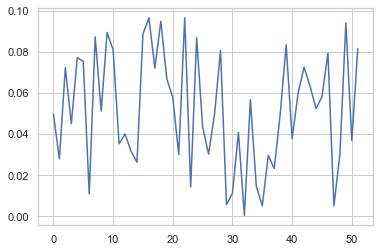

In [102]:
plt.plot(weight.reshape(-1))